C:\Users\49381\AppData\Local\Temp\ipykernel_8076\3312303839.py:112: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset['Population'], subset['AvgIncome'], color=color, label=f"{region} (2018)", s=150, marker='x', edgecolor='black', alpha=0.8)


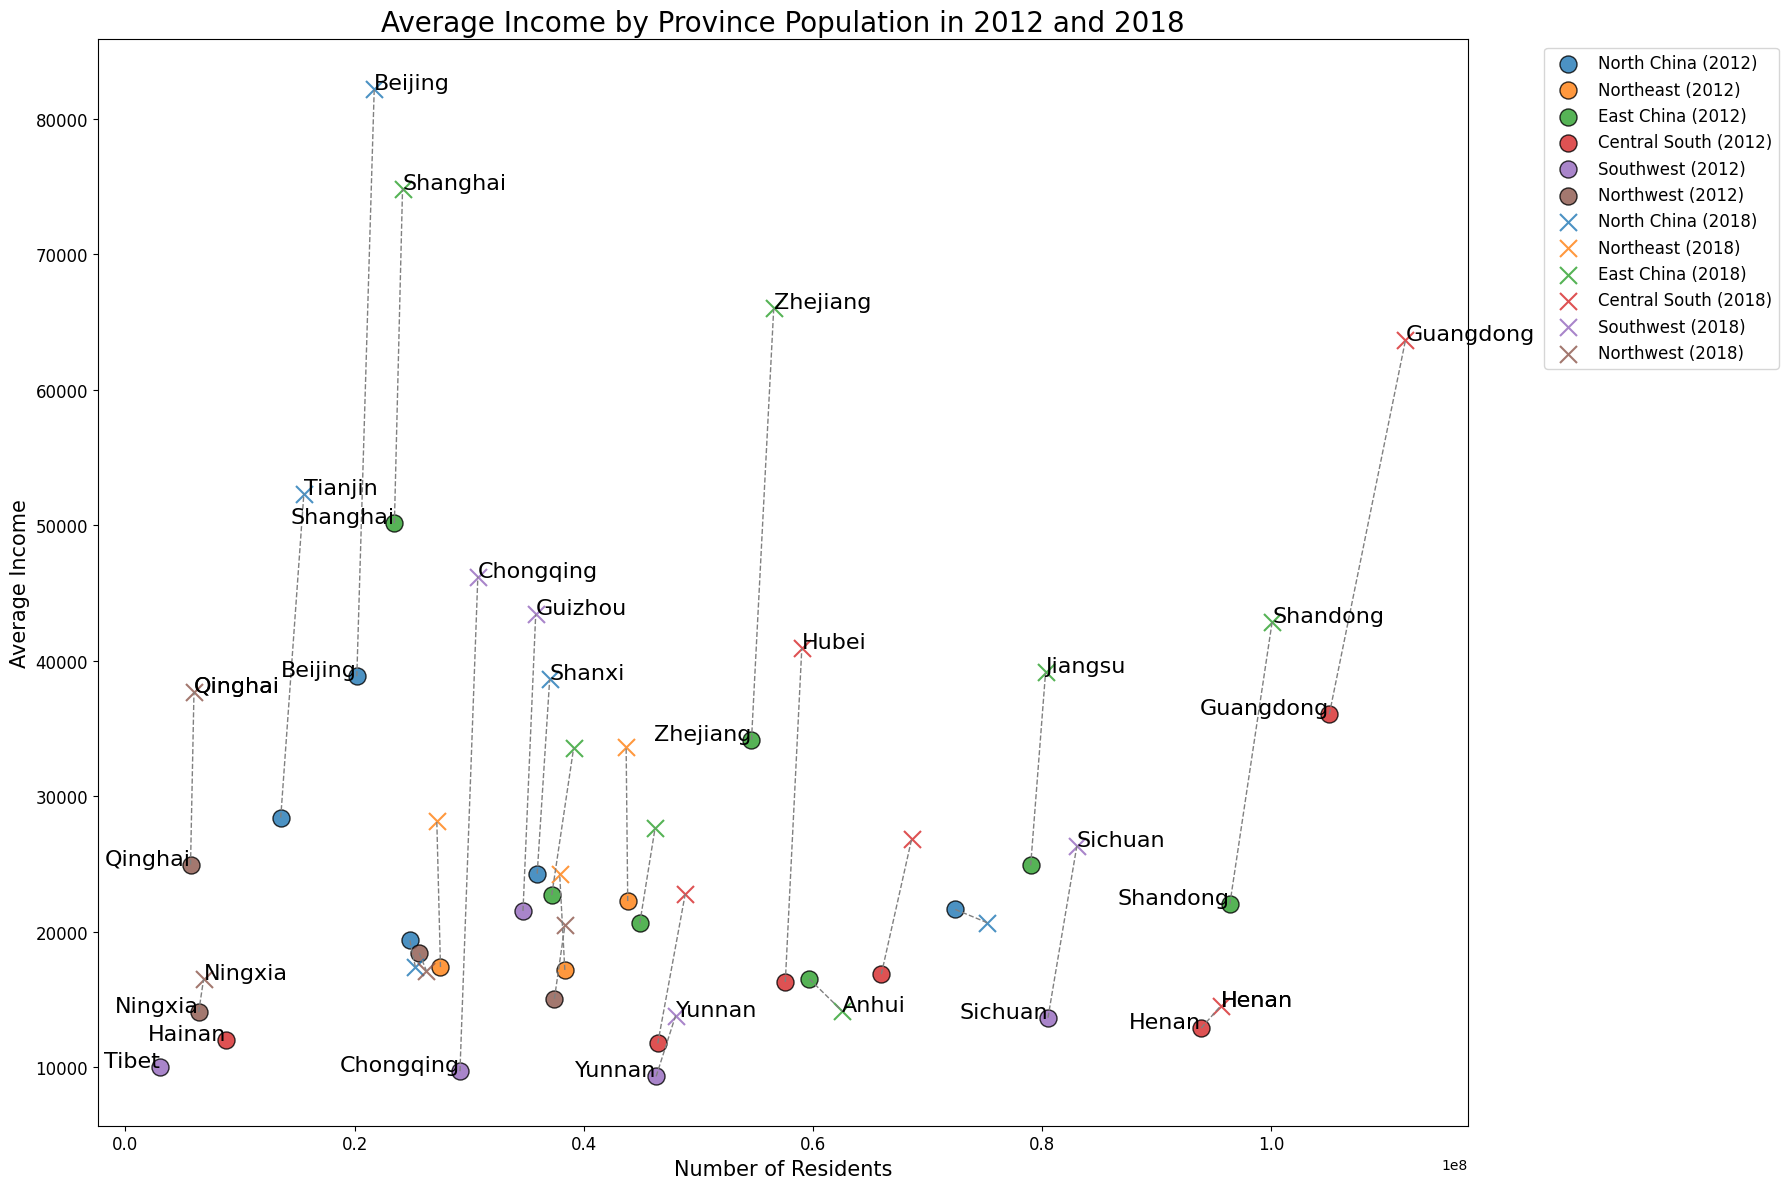

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def label_point(x, y, val, ax, text_offset, direction):
    """Helper function to add labels with connectors"""
    if direction == "left":
        ax.annotate(val, (x, y), textcoords="offset points", xytext=(-text_offset, 0), ha='right', fontsize=10,
                    arrowprops=dict(arrowstyle="->", color='red'))
    else:
        ax.annotate(val, (x, y), textcoords="offset points", xytext=(text_offset, 0), ha='left', fontsize=10,
                    arrowprops=dict(arrowstyle="->", color='red'))
# Load the data (replace with your paths)
data_2012 = pd.read_stata("CGSS2012.dta")
data_2018 = pd.read_stata("CGSS2018.dta")

# Data cleaning
data_2012 = data_2012[~data_2012['a8a'].isin([9999997,9999998,9999999])]
data_2018 = data_2018[~data_2018['a8a'].isin([9999997,9999998,9999999])]
data_2012["a8a"]=data_2012["a8a"].dropna()
data_2018["a8a"]=data_2018["a8a"].dropna()

# Tramsform to Numeric data
data_2012['a8a'] = pd.to_numeric(data_2012['a8a'], errors='coerce')
data_2018['a8a'] = pd.to_numeric(data_2018['a8a'], errors='coerce')

avg_income_2012 = data_2012.groupby('a271')['a8a'].mean()
avg_income_2018 = data_2018.groupby('provinces')['a8a'].mean()
# Given population data for 2012 and 2018

# Generating the dictionary with Chinese province names as keys and numbers as values
pop_data_2012 = {
    "北京市": 20190000, "天津市": 13550000, "河北省": 72410000, "山西省": 35930000,
    "内蒙古自治区": 24820000, "辽宁省": 43830000, "吉林省": 27490000, "黑龙江省": 38340000,
    "上海市": 23470000, "江苏省": 78990000, "浙江省": 54630000, "安徽省": 59680000,
    "福建省": 37200000, "江西省": 44880000, "山东省": 96370000, "河南省": 93880000,
    "湖北省": 57580000, "湖南省": 65960000, "广东省": 105050000, "广西壮族自治区": 46450000,
    "海南省": 8770000, "重庆市": 29190000, "四川省": 80500000, "贵州省": 34690000,
    "云南省": 46310000, "西藏自治区": 3030000, "陕西省": 37430000, "甘肃省": 25640000,
    "青海省": 5680000, "宁夏回族自治区": 6390000,"新疆维吾尔自治区": 22090000
}


pop_data_2018 = {
    "北京市": 21710000, "天津市": 15570000, "河北省": 75200000, "山西省": 37020000,
    "内蒙古自治区": 25290000, "辽宁省": 43690000, "吉林省": 27170000, "黑龙江省": 37890000,
    "上海市": 24180000, "江苏省": 80290000, "浙江省": 56570000, "安徽省": 62550000,
    "福建省": 39110000, "江西省": 46220000, "山东省": 100060000, "河南省": 95590000,
    "湖北省": 59020000, "湖南省": 68600000, "广东省": 111690000, "广西壮族自治区": 48850000,
    "海南省": 9260000, "重庆市": 30750000, "四川省": 83020000, "贵州省": 35800000,
    "云南省": 48010000, "西藏自治区": 3370000, "陕西省": 38350000, "甘肃省": 26260000,
    "青海省": 5980000, "宁夏回族自治区": 6820000, "新疆维吾尔自治区": 24450000, "深圳市":13438800
}

merged_2012 = pd.DataFrame.from_dict(avg_income_2012).reset_index().rename(columns={'a271': 'Province', 'a8a': 'AvgIncome'})
merged_2012['Population'] = merged_2012['Province'].map(pop_data_2012)

merged_2018 = pd.DataFrame.from_dict(avg_income_2018).reset_index().rename(columns={'provinces': 'Province', 'a8a': 'AvgIncome'})
merged_2018['Population'] = merged_2018['Province'].map(pop_data_2018)

# Apply the mapping of provinces to the merged data
province_map = {
    "北京市": "Beijing", "天津市": "Tianjin", "河北省": "Hebei", "山西省": "Shanxi",
    "内蒙古自治区": "Inner Mongolia", "辽宁省": "Liaoning", "吉林省": "Jilin", "黑龙江省": "Heilongjiang",
    "上海市": "Shanghai", "江苏省": "Jiangsu", "浙江省": "Zhejiang", "安徽省": "Anhui",
    "福建省": "Fujian", "江西省": "Jiangxi", "山东省": "Shandong", "河南省": "Henan",
    "湖北省": "Hubei", "湖南省": "Hunan", "广东省": "Guangdong", "广西壮族自治区": "Guangxi",
    "海南省": "Hainan", "重庆市": "Chongqing", "四川省": "Sichuan", "贵州省": "Guizhou",
    "云南省": "Yunnan", "西藏自治区": "Tibet", "陕西省": "Shaanxi", "甘肃省": "Gansu",
    "青海省": "Qinghai", "宁夏回族自治区": "Ningxia", "新疆维吾尔自治区": "Xinjiang", "深圳市": "Shenzhen"
}
merged_2012['Province_Eng'] = merged_2012['Province'].map(province_map)
merged_2018['Province_Eng'] = merged_2018['Province'].map(province_map)

# Mapping provinces to their respective English-named regions
region_map = {
    "北京市": "North China", "天津市": "North China", "河北省": "North China", "山西省": "North China", "内蒙古自治区": "North China",
    "辽宁省": "Northeast", "吉林省": "Northeast", "黑龙江省": "Northeast",
    "上海市": "East China", "江苏省": "East China", "浙江省": "East China", "安徽省": "East China", "福建省": "East China", 
    "江西省": "East China", "山东省": "East China",
    "河南省": "Central South", "湖北省": "Central South", "湖南省": "Central South", "广东省": "Central South", 
    "广西壮族自治区": "Central South", "海南省": "Central South",
    "重庆市": "Southwest", "四川省": "Southwest", "贵州省": "Southwest", "云南省": "Southwest", "西藏自治区": "Southwest",
    "陕西省": "Northwest", "甘肃省": "Northwest", "青海省": "Northwest", "宁夏回族自治区": "Northwest", "新疆维吾尔自治区": "Northwest",
    "深圳市": "Central South"
}

# Apply the mapping to the merged data
merged_2012['Region'] = merged_2012['Province'].map(region_map)
merged_2018['Region'] = merged_2018['Province'].map(region_map)

# Define a color palette for regions
region_colors = {
    "North China": "#1f77b4",
    "Northeast": "#ff7f0e",
    "East China": "#2ca02c",
    "Central South": "#d62728",
    "Southwest": "#9467bd",
    "Northwest": "#8c564b"
}

# Plotting
plt.figure(figsize=(18, 12))

# Scatter plots for 2012 using "x" markers
for region, color in region_colors.items():
    subset = merged_2012[merged_2012['Region'] == region]
    plt.scatter(subset['Population'], subset['AvgIncome'], color=color, label=f"{region} (2012)", s=150, marker='o', edgecolor='black', alpha=0.8)

# Scatter plots for 2018 using "o" markers
for region, color in region_colors.items():
    subset = merged_2018[merged_2018['Region'] == region]
    plt.scatter(subset['Population'], subset['AvgIncome'], color=color, label=f"{region} (2018)", s=150, marker='x', edgecolor='black', alpha=0.8)

# Drawing lines connecting 2012 and 2018 data points for each province
for province in province_map.keys():
    pop_2012 = merged_2012.loc[merged_2012['Province'] == province, 'Population'].values
    income_2012 = merged_2012.loc[merged_2012['Province'] == province, 'AvgIncome'].values
    pop_2018 = merged_2018.loc[merged_2018['Province'] == province, 'Population'].values
    income_2018 = merged_2018.loc[merged_2018['Province'] == province, 'AvgIncome'].values
    if len(pop_2012) > 0 and len(pop_2018) > 0:
        plt.plot([pop_2012[0], pop_2018[0]], [income_2012[0], income_2018[0]], color='grey', linestyle='--', linewidth=1)

# label some of the provinces:
for index, row in merged_2012.iterrows():
    if row['Population'] > 80e6 or row['AvgIncome'] > 30000:
        plt.annotate(row['Province_Eng'], (row['Population'], row['AvgIncome']), fontsize=16, alpha=1, ha='right')

for index, row in merged_2018.iterrows():
    if row['Population'] > 80e6 or row['AvgIncome'] > 37500:
        plt.annotate(row['Province_Eng'], (row['Population'], row['AvgIncome']), fontsize=16, alpha=1, ha='left')

for index, row in merged_2012.iterrows():
    if row['Population'] < 10e6 or row['AvgIncome'] < 10000:
        plt.annotate(row['Province_Eng'], (row['Population'], row['AvgIncome']), fontsize=16, alpha=1, ha='right')

for index, row in merged_2018.iterrows():
    if row['Population'] < 10e6 or row['AvgIncome'] < 15000:
        plt.annotate(row['Province_Eng'], (row['Population'], row['AvgIncome']), fontsize=16, alpha=1, ha='left')

# Label the plot
plt.title('Average Income by Province Population in 2012 and 2018', fontsize=20)
plt.xlabel('Number of Residents', fontsize=15)
plt.ylabel('Average Income', fontsize=15)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


C:\Users\49381\AppData\Local\Temp\ipykernel_7328\266193249.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2018['region'] = data_2018['provinces'].map(province_to_region)
C:\Users\49381\AppData\Local\Temp\ipykernel_7328\266193249.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2012['region'] = data_2012['a271'].map(province_to_region)
C:\Users\49381\AppData\Local\Temp\ipykernel_7328\266193249.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

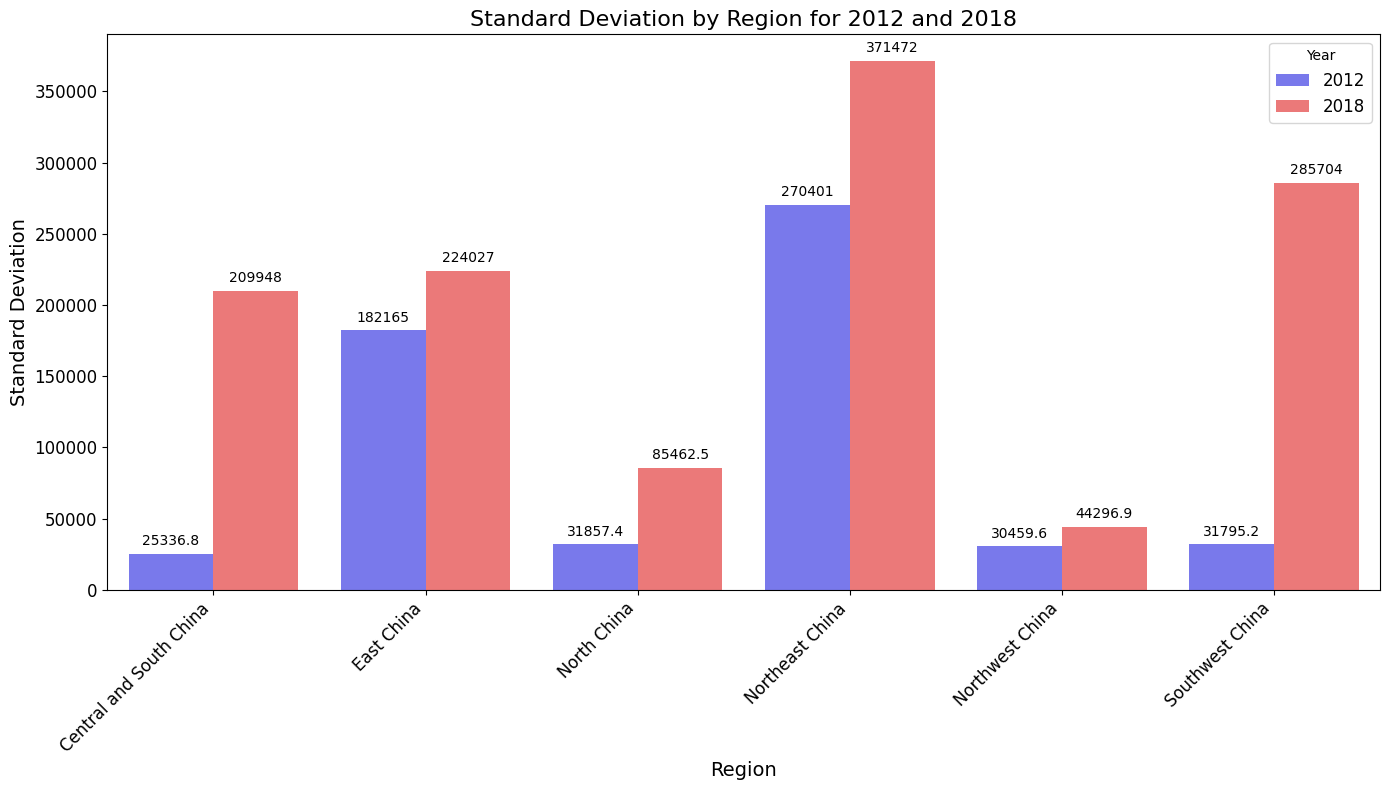

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_2018 = pd.read_stata("CGSS2018.dta", convert_categoricals=False)
data_2012 = pd.read_stata("CGSS2012.dta", convert_categoricals=False)
# Mapping of provinces to regions
province_to_region = {
    "北京市": "North China",
    "天津市": "North China",
    "河北省": "North China",
    "山西省": "North China",
    "内蒙古自治区": "North China",
    
    "辽宁省": "Northeast China",
    "吉林省": "Northeast China",
    "黑龙江省": "Northeast China",
    
    "上海市": "East China",
    "江苏省": "East China",
    "浙江省": "East China",
    "安徽省": "East China",
    "福建省": "East China",
    "江西省": "East China",
    "山东省": "East China",
    "台湾省": "East China",
    
    "河南省": "Central and South China",
    "湖北省": "Central and South China",
    "湖南省": "Central and South China",
    "广东省": "Central and South China",
    "广西壮族自治区": "Central and South China",
    "海南省": "Central and South China",
    "香港特别行政区": "Central and South China",
    "澳门特别行政区": "Central and South China",
    "深圳市": "Central and South China",
    
    "重庆市": "Southwest China",
    "四川省": "Southwest China",
    "贵州省": "Southwest China",
    "云南省": "Southwest China",
    "西藏自治区": "Southwest China",

    "陕西省": "Northwest China",
    "甘肃省": "Northwest China",
    "青海省": "Northwest China",
    "宁夏回族自治区": "Northwest China",
    "新疆维吾尔自治区": "Northwest China"
}

# Add 'region' column to both datasets based on the province column(a271 in the 2012 data)
data_2018['region'] = data_2018['provinces'].map(province_to_region)
data_2012['region'] = data_2012['a271'].map(province_to_region)

# Filter out specified values from income columns
filtered_data_2018 = data_2018[~data_2018['a8a'].isin([9999997, 9999998, 9999999, 9999990])]
filtered_data_2012 = data_2012[~data_2012['a8a'].isin([9999997, 9999998, 9999999, 9999990])]
# Generate a new column to clarify two 'a8a's and drop the missing values
filtered_data_2018['a8a']=filtered_data_2018['a8a'].dropna()
filtered_data_2012['A8a']=filtered_data_2012['a8a'].dropna()

std_2018 = filtered_data_2018.groupby('region')['a8a'].std().reset_index()
std_2012 = filtered_data_2012.groupby('region')['A8a'].std().reset_index()

# Merge the std data from both years
merged_std_data = std_2012.merge(std_2018, on="region", how="outer")

# Calculate growth rate for each region
merged_std_data['growth_rate'] = ((merged_std_data['a8a'] - merged_std_data['A8a']) / merged_std_data['A8a']) * 100
sorted_growth_data = merged_std_data.sort_values(by="growth_rate", ascending=False)

# Prepare data in long format for side-by-side bar plotting
merged_std_long = merged_std_data.melt(id_vars=['region'], value_vars=['A8a', 'a8a'], 
                                            var_name='Year', value_name='std')
# Map the column names to actual years for better clarity
merged_std_long['Year'] = merged_std_long['Year'].map({'A8a': '2012', 'a8a': '2018'})

# Visualization
plt.figure(figsize=(14, 8))
ax=sns.barplot(x='region', y='std', hue='Year', data=merged_std_long, palette=["b", "r"], alpha=0.6)
ax.bar_label(ax.containers[0], padding=4)
ax.bar_label(ax.containers[1], padding=4)
# Set title, legend, and labels
plt.title('Standard Deviation by Region for 2012 and 2018', fontsize=16)
plt.ylabel('Standard Deviation', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title="Year", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
median_2018 = filtered_data_2018.groupby('region')['a8a'].median().reset_index()
median_2012 = filtered_data_2012.groupby('region')['A8a'].median().reset_index()

# Merge the median data from both years
merged_median_data = median_2012.merge(median_2018, on="region", how="outer")

# Calculate growth rate for each region
merged_median_data['growth_rate'] = ((merged_median_data['a8a'] - merged_median_data['A8a']) / merged_median_data['A8a']) * 100
sorted_growth_data = merged_median_data.sort_values(by="growth_rate", ascending=False)

sorted_growth_data

,region,A8a,a8a,growth_rate
2,North China,21600.0,36000.0,66.666672
5,Southwest China,6000.0,10000.0,66.666672
3,Northeast China,13000.0,20000.0,53.846157
0,Central and South China,10000.0,15000.0,50.000000
1,East China,20000.0,30000.0,50.000000
4,Northwest China,9860.0,10000.0,1.419878
